<a href="https://colab.research.google.com/github/saikirankesoju/AIML/blob/main/AIML-Ass-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics:
         PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000        

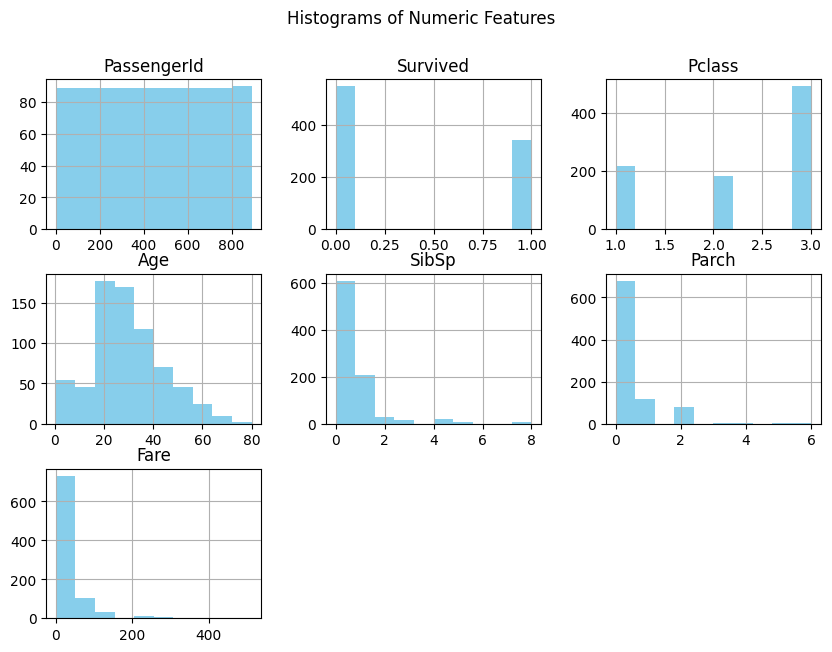

<ipython-input-2-82f5debd6849>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


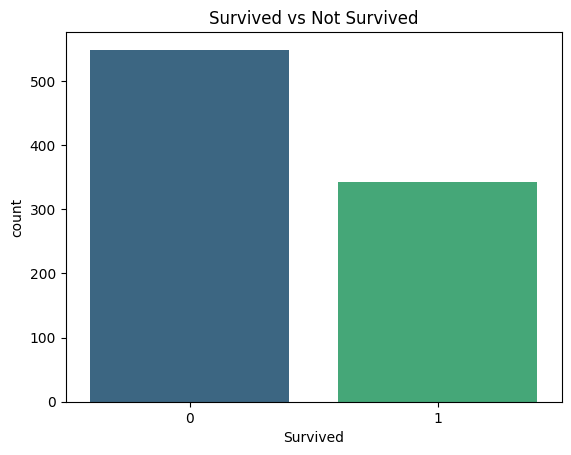

<ipython-input-2-82f5debd6849>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')


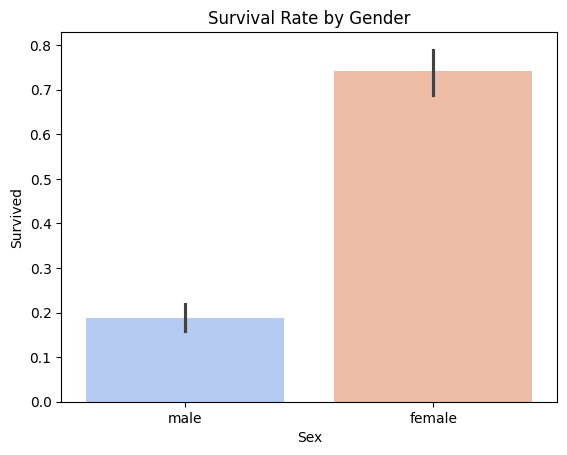

<ipython-input-2-82f5debd6849>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')


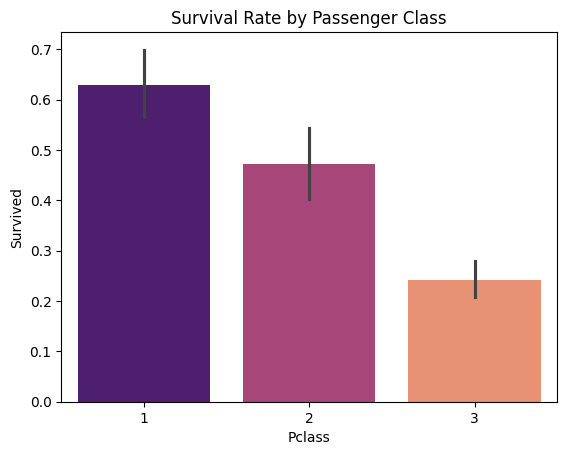

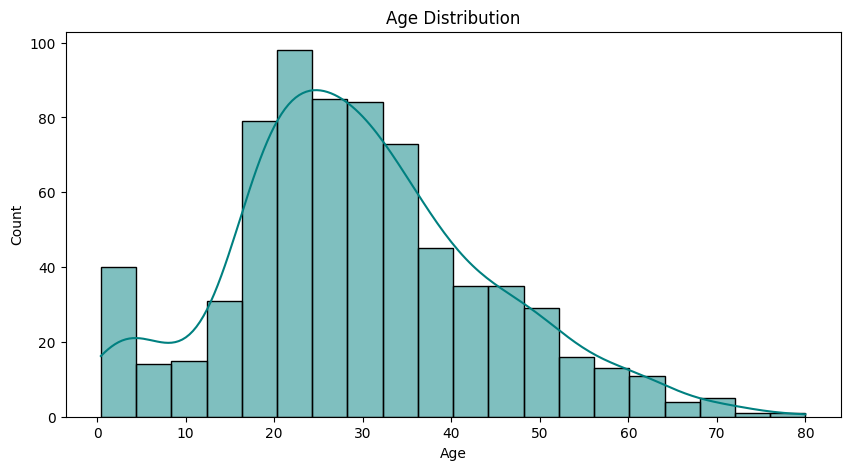

<ipython-input-2-82f5debd6849>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')


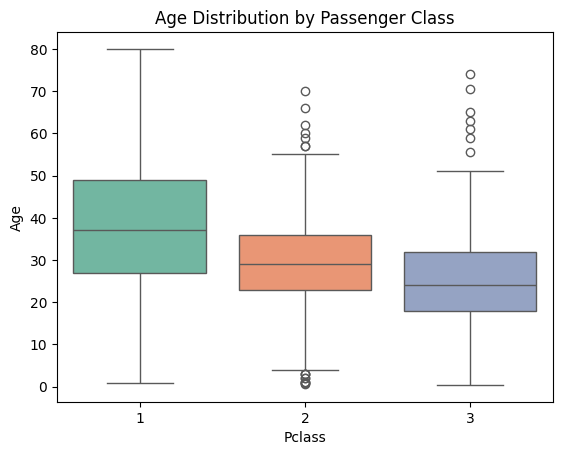

In [2]:

#PART 01
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("Data Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe(include='all'))

print("\nColumn Names:\n", df.columns)

df.hist(figsize=(10, 7), color='skyblue')
plt.suptitle('Histograms of Numeric Features')
plt.show()

sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survived vs Not Survived')
plt.show()

sns.barplot(x='Sex', y='Survived', data=df, palette='coolwarm')
plt.title('Survival Rate by Gender')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df, palette='magma')
plt.title('Survival Rate by Passenger Class')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), kde=True, color='teal')
plt.title('Age Distribution')
plt.show()


sns.boxplot(x='Pclass', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Passenger Class')
plt.show()
df['Age'].fillna(df['Age'].median(), inplace=True)

df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df.to_csv('cleaned_titanic.csv', index=False)


F1 Score: 0.7641509433962265


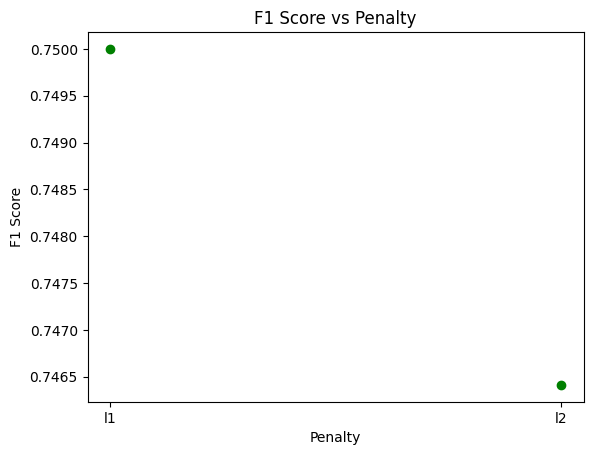

In [3]:
#PART-02
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('cleaned_titanic.csv')

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='most_frequent')

X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"\nF1 Score: {f1}")

penalties = ['l1', 'l2']
f1_scores = []
for penalty in penalties:
    model = LogisticRegression(penalty=penalty, solver='saga', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

# Plotting
plt.scatter(penalties, f1_scores, color='GREEN')
plt.xlabel('Penalty')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Penalty')
plt.show()